In [1]:
# This branch of qiskit is required:  pip install git+https://github.com/LNoorl/qiskit-terra.git@feature/sk-pass

import numpy as np
import dreamcoder as dc
from dreamcoder.domains.quantum_circuits.primitives import *
from dreamcoder.domains.quantum_circuits.tasks import *
import dill as pickle
import time
from tqdm import trange
import random
import bin.binutil
import datetime
%load_ext line_profiler
%load_ext autoreload
%autoreload 2
dc.domains.quantum_circuits.primitives.GLOBAL_LIMITED_CONNECTIVITY = False


# Some fixed-size circuits

## 1-qubit gates

In [20]:
# X
with QiskitTester(1) as QT:
    QT.circuit.h(QT.q(0))
    QT.circuit.h(QT.q(0))
QT.circuit.draw(), QT.transpile().draw()


(   ┌───┐┌───┐
 q: ┤ H ├┤ H ├
    └───┘└───┘,
    
 q: 
    )

In [21]:
QT.result


array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

X

In [23]:
# X
with QiskitTester(circuit=([3, (("x", 2),)])) as QT:
    QT.circuit.x(QT.q(2))
QT.circuit.draw(), QT.transpile().draw()

x []


(     ┌───┐
 q_0: ┤ X ├
      └───┘
 q_1: ─────
           
 q_2: ─────
           ,
 global phase: π
      ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐
 q_0: ┤ H ├┤ T ├┤ T ├┤ T ├┤ T ├┤ H ├
      └───┘└───┘└───┘└───┘└───┘└───┘
 q_1: ──────────────────────────────
                                    
 q_2: ──────────────────────────────
                                    )

Y

In [22]:
# Y
with QiskitTester(circuit=([1, (("y", 0),)])) as QT:
    QT.circuit.y(QT.q(0))
QT.circuit.draw(), QT.transpile().draw()

y []


(   ┌───┐
 q: ┤ Y ├
    └───┘,
 global phase: 3π/4
    ┌───┐┌───┐┌───┐┌───┐┌─────┐┌─────┐┌───┐┌───┐┌───┐
 q: ┤ H ├┤ T ├┤ T ├┤ H ├┤ Tdg ├┤ Tdg ├┤ H ├┤ T ├┤ T ├
    └───┘└───┘└───┘└───┘└─────┘└─────┘└───┘└───┘└───┘)

Z

In [25]:
with QiskitTester(circuit=([1, (("z", 0),)])) as QT:
    QT.circuit.z(QT.q(0))
QT.circuit.draw(), QT.transpile().draw()

primitives.py:53 > Code consistent with Qiskit


z []


(   ┌───┐
 q: ┤ Z ├
    └───┘,
    ┌───┐┌───┐┌───┐┌───┐
 q: ┤ T ├┤ T ├┤ T ├┤ T ├
    └───┘└───┘└───┘└───┘)

T

In [28]:
# T = p(π/4)
with QiskitTester(circuit=([1, (("tdg", 0),)])) as QT:
    QT.circuit.tdg(QT.q(0))
QT.circuit.draw(), QT.transpile().draw()

primitives.py:53 > Code consistent with Qiskit


tdg []


(   ┌─────┐
 q: ┤ Tdg ├
    └─────┘,
    ┌─────┐
 q: ┤ Tdg ├
    └─────┘)

S

In [29]:
# S = p(π/2)
with QiskitTester(circuit=([1, (("s", 0),)])) as QT:
    QT.circuit.s(0)
QT.circuit.draw(), QT.transpile().draw()

primitives.py:53 > Code consistent with Qiskit


s []


(   ┌───┐
 q: ┤ S ├
    └───┘,
    ┌───┐┌───┐
 q: ┤ T ├┤ T ├
    └───┘└───┘)

$\sqrt X$

In [30]:
with QiskitTester(circuit=([1, (("sx", 0),)])) as QT:
    QT.circuit.sx(QT.q(0))
QT.circuit.draw(), QT.transpile().draw()

primitives.py:53 > Code consistent with Qiskit


sx []


(   ┌────┐
 q: ┤ √X ├
    └────┘,
 global phase: π
    ┌───┐┌───┐┌───┐┌───┐
 q: ┤ H ├┤ T ├┤ T ├┤ H ├
    └───┘└───┘└───┘└───┘)

$\sqrt X ^\dag$

In [31]:
with QiskitTester(circuit=([1, (("sxdg", 0),)])) as QT:
    QT.circuit.sxdg(QT.q(0))
QT.circuit.draw(), QT.transpile().draw()

primitives.py:53 > Code consistent with Qiskit


sxdg []


(   ┌──────┐
 q: ┤ √Xdg ├
    └──────┘,
 global phase: π
    ┌───┐┌─────┐┌─────┐┌───┐
 q: ┤ H ├┤ Tdg ├┤ Tdg ├┤ H ├
    └───┘└─────┘└─────┘└───┘)

Consistency checks

In [21]:
with QiskitTester(1) as QT:
    QT.circuit.append(qk.circuit.library.PhaseGate(np.pi), (0,))
transpiled = qk.transpile(QT.circuit, backend)
circuit2 = pm.run(transpiled)
discretized = skd(circuit2)
QT.circuit.draw(), transpiled.draw(), circuit2.draw(), discretized.draw()

p [3.141592653589793]


(   ┌──────┐
 q: ┤ P(π) ├
    └──────┘,
    ┌──────┐
 q: ┤ P(π) ├
    └──────┘,
    ┌──────┐
 q: ┤ P(π) ├
    └──────┘,
    ┌───┐┌───┐┌───┐┌───┐
 q: ┤ T ├┤ T ├┤ T ├┤ T ├
    └───┘└───┘└───┘└───┘)

In [32]:
with QiskitTester(1) as QT:
    QT.circuit.append(qk.circuit.library.PhaseGate(3 * np.pi / 4), (0,))
transpiled = qk.transpile(QT.circuit, backend)
circuit2 = pm.run(transpiled)
discretized = skd(circuit2)
QT.circuit.draw(), transpiled.draw(), circuit2.draw(), discretized.draw()

p [2.356194490192345]


(   ┌─────────┐
 q: ┤ P(3π/4) ├
    └─────────┘,
    ┌─────────┐
 q: ┤ P(3π/4) ├
    └─────────┘,
    ┌─────────┐
 q: ┤ P(3π/4) ├
    └─────────┘,
    ┌───┐┌───┐┌───┐
 q: ┤ T ├┤ T ├┤ T ├
    └───┘└───┘└───┘)

In [ ]:
with QiskitTester(1) as QT:
    QT.circuit.tdg(0)
    QT.circuit.tdg(0)
QT.circuit = pm.run(QT.circuit)
transpiled = qk.transpile(QT.circuit, backend, basis_gates)
discretized = skd(transpiled)
QT.circuit.draw(), transpiled.draw(), discretized.draw()

In [ ]:
with QiskitTester(1) as QT:
    QT.circuit.append(qk.circuit.library.PhaseGate(3 * np.pi / 2), (0,))
transpiled = qk.transpile(QT.circuit, backend)
circuit2 = pm.run(transpiled)
discretized = skd(circuit2)
QT.circuit.draw(), transpiled.draw(), circuit2.draw(), discretized.draw()

In [ ]:
with QiskitTester(1) as QT:
    QT.circuit.append(qk.circuit.library.PhaseGate(5 * np.pi / 2), (0,))
transpiled = qk.transpile(QT.circuit, backend)
circuit2 = pm.run(transpiled)
discretized = skd(circuit2)
QT.circuit.draw(), transpiled.draw(), circuit2.draw(), discretized.draw()

In [ ]:
# (just as a test)
# we should be able to transpile this one
with QiskitTester(1) as QT:
    QT.circuit.p(np.pi / 8, 0)
    QT.circuit.p(np.pi / 8, 0)
transpiled = qk.transpile(QT.circuit, backend)
circuit2 = pm.run(transpiled)
discretized = skd(circuit2)
QT.circuit.draw(), transpiled.draw(), discretized.draw()

In [37]:
# we should be able to transpile this one
with QiskitTester(1) as QT:
    QT.circuit.p(np.pi / 8, 0)
    QT.circuit.p(np.pi / 8, 0)
transpiled = qk.transpile(QT.circuit, backend)
circuit2 = pm.run(transpiled)
discretized = skd(circuit2)
QT.circuit.draw(), transpiled.draw(), discretized.draw()

u1 [0.7853981633974483]


(   ┌────────┐┌────────┐
 q: ┤ P(π/8) ├┤ P(π/8) ├
    └────────┘└────────┘,
    ┌─────────┐
 q: ┤ U1(π/4) ├
    └─────────┘,
    ┌───┐
 q: ┤ T ├
    └───┘)

## 2-qubit gates

Controlled-Y

In [33]:
with QiskitTester(circuit=([2, (("cy", 0, 1),)])) as QT:
    QT.circuit.cy(QT.q(0), QT.q(1))
QT.circuit.draw(), QT.transpile().draw()

primitives.py:53 > Code consistent with Qiskit


cy []


(     ┌───┐
 q_0: ┤ Y ├
      └─┬─┘
 q_1: ──■──
           ,
      ┌─────┐┌─────┐┌───┐┌───┐┌───┐
 q_0: ┤ Tdg ├┤ Tdg ├┤ X ├┤ T ├┤ T ├
      └─────┘└─────┘└─┬─┘└───┘└───┘
 q_1: ────────────────■────────────
                                   )

CZ

In [34]:
with QiskitTester(circuit=([2, (("cz", 0, 1),)])) as QT:
    QT.circuit.cz(QT.q(0), QT.q(1))
QT.circuit.draw(), QT.transpile().draw()

primitives.py:53 > Code consistent with Qiskit


cz []


(        
 q_0: ─■─
       │ 
 q_1: ─■─
         ,
      ┌───┐┌───┐┌───┐
 q_0: ┤ H ├┤ X ├┤ H ├
      └───┘└─┬─┘└───┘
 q_1: ───────■───────
                     )

SWAP

In [35]:
with QiskitTester(circuit=([2, (("swap", 0, 1),)])) as QT:
    QT.circuit.swap(QT.q(0), QT.q(1))
QT.circuit.draw(), QT.transpile().draw()

primitives.py:53 > Code consistent with Qiskit


swap []


(        
 q_0: ─X─
       │ 
 q_1: ─X─
         ,
      ┌───┐     ┌───┐
 q_0: ┤ X ├──■──┤ X ├
      └─┬─┘┌─┴─┐└─┬─┘
 q_1: ──■──┤ X ├──■──
           └───┘     )

iSWAP

In [36]:
with QiskitTester(circuit=([2, (("iswap", 0, 1),)])) as QT:
    QT.circuit.iswap(QT.q(0), QT.q(1))
QT.circuit.draw(), QT.transpile().draw()

primitives.py:53 > Code consistent with Qiskit


s []
u2 [0.0, -1.5707963267948966]
cx []
cx []
h []


(     ┌────────┐
 q_0: ┤1       ├
      │  Iswap │
 q_1: ┤0       ├
      └────────┘,
 global phase: π
      ┌───┐┌───┐     ┌───┐     ┌───┐
 q_0: ┤ T ├┤ T ├─────┤ X ├──■──┤ H ├
      ├───┤├───┤┌───┐└─┬─┘┌─┴─┐└───┘
 q_1: ┤ T ├┤ T ├┤ H ├──■──┤ X ├─────
      └───┘└───┘└───┘     └───┘     )

Controlled S

In [37]:
with QiskitTester(circuit=([2, (("cs", 0, 1),)])) as QT:
    QT.circuit.append(qk.circuit.library.SGate().control(1), (0, 1))
QT.circuit.draw(), QT.transpile().draw()

primitives.py:53 > Code consistent with Qiskit


cp [1.5707963267948966]


(          
 q_0: ──■──
      ┌─┴─┐
 q_1: ┤ S ├
      └───┘,
      ┌───┐                      
 q_0: ┤ T ├──■───────────■───────
      └───┘┌─┴─┐┌─────┐┌─┴─┐┌───┐
 q_1: ─────┤ X ├┤ Tdg ├┤ X ├┤ T ├
           └───┘└─────┘└───┘└───┘)

In [13]:
np.round(QT.result)


array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j]])

DCX
(Double CNOT)

In [23]:
with QiskitTester(2) as QT:
    QT.circuit.dcx(QT.q(0), QT.q(1))
QT.circuit.draw(), QT.transpile().draw()

cx []
cx []


(     ┌──────┐
 q_0: ┤1     ├
      │  Dcx │
 q_1: ┤0     ├
      └──────┘,
      ┌───┐     
 q_0: ┤ X ├──■──
      └─┬─┘┌─┴─┐
 q_1: ──■──┤ X ├
           └───┘)

CH
(Controlled Hadamard)

In [44]:
with QiskitTester(circuit=([2, (("ch", 0, 1),)])) as QT:
    QT.circuit.ch(QT.q(0), QT.q(1))
QT.circuit.draw(), QT.transpile().draw()

primitives.py:53 > Code consistent with Qiskit


u2 [0.7853981633974483, -1.5707963267948966]
cx []
u2 [-1.5707963267948966, 2.356194490192345]


(     ┌───┐
 q_0: ┤ H ├
      └─┬─┘
 q_1: ──■──
           ,
 global phase: π
      ┌───┐┌───┐┌───┐┌───┐┌───┐┌─────┐┌───┐┌─────┐┌─────┐
 q_0: ┤ T ├┤ T ├┤ H ├┤ T ├┤ X ├┤ Tdg ├┤ H ├┤ Tdg ├┤ Tdg ├
      └───┘└───┘└───┘└───┘└─┬─┘└─────┘└───┘└─────┘└─────┘
 q_1: ──────────────────────■────────────────────────────
                                                         )

### Consistency checks

In [16]:
# Controlled Phase(α) requires to be able to do Phase(α/2)
with QiskitTester(2) as QT:
    QT.circuit.append(qk.circuit.library.CPhaseGate(np.pi / 4), (0, 1))
transpiled = qk.transpile(QT.circuit, backend)
circuit2 = pm.run(transpiled)
discretized = skd(circuit2)
QT.circuit.draw(), transpiled.draw(), circuit2.draw(), discretized.draw()

cp [0.7853981633974483]


(              
 q_0: ─■───────
       │P(π/4) 
 q_1: ─■───────
               ,
               
 q_0: ─■───────
       │P(π/4) 
 q_1: ─■───────
               ,
      ┌────────┐                               
 q_0: ┤ P(π/8) ├──■───────────────■────────────
      └────────┘┌─┴─┐┌─────────┐┌─┴─┐┌────────┐
 q_1: ──────────┤ X ├┤ P(-π/8) ├┤ X ├┤ P(π/8) ├
                └───┘└─────────┘└───┘└────────┘,
 global phase: 3.7306
      ┌───┐┌─────┐┌───┐┌─────┐┌───┐┌─────┐┌───┐┌─────┐┌───┐┌─────┐┌─────┐┌───┐»
 q_0: ┤ H ├┤ Tdg ├┤ H ├┤ Tdg ├┤ H ├┤ Tdg ├┤ H ├┤ Tdg ├┤ H ├┤ Tdg ├┤ Tdg ├┤ H ├»
      └───┘└─────┘└───┘└─────┘└───┘└─────┘└───┘└─────┘└───┘└─────┘└─────┘└───┘»
 q_1: ────────────────────────────────────────────────────────────────────────»
                                                                              »
 «     ┌───┐┌───┐┌───┐┌───┐┌─────┐┌───┐┌─────┐┌───┐┌─────┐┌───┐┌─────┐┌───┐»
 «q_0: ┤ T ├┤ H ├┤ T ├┤ H ├┤ Tdg ├┤ H ├┤ Tdg ├┤ H ├┤ Tdg ├┤ H ├┤ Tdg ├┤ H ├»
 «     └───┘└───┘└───

In [ ]:
# This is CS, but can we transpile it?
with QiskitTester(2) as QT:
    QT.circuit.cp(np.pi / 2, QT.q(0), QT.q(1))
transpiled = qk.transpile(QT.circuit, backend)
circuit2 = pm.run(transpiled)
discretized = skd(circuit2)
QT.circuit.draw(), transpiled.draw(), discretized.draw()

## 3-qubit gates

Controlled-Controlled X

In [25]:
with QiskitTester(3) as QT:
    QT.circuit.ccx(QT.q(0), QT.q(1), QT.q(2))
QT.circuit.draw(), QT.transpile().draw()

ccx []


(     ┌───┐
 q_0: ┤ X ├
      └─┬─┘
 q_1: ──■──
        │  
 q_2: ──■──
           ,
      ┌───┐┌───┐┌─────┐┌───┐┌───┐┌───┐┌─────┐┌───┐┌───┐ ┌───┐      
 q_0: ┤ H ├┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ X ├┤ T ├─┤ H ├──────
      └───┘└─┬─┘└─────┘└─┬─┘└───┘└─┬─┘└┬───┬┘└─┬─┘├───┤┌┴───┴┐┌───┐
 q_1: ───────■───────────┼─────────■───┤ T ├───┼──┤ X ├┤ Tdg ├┤ X ├
                         │             └───┘   │  └─┬─┘└┬───┬┘└─┬─┘
 q_2: ───────────────────■─────────────────────■────■───┤ T ├───■──
                                                        └───┘      )

Controlled-Swap

In [26]:
with QiskitTester(3) as QT:
    QT.circuit.cswap(QT.q(0), QT.q(1), QT.q(2))
QT.circuit.draw(), QT.transpile().draw()

cswap []


(        
 q_0: ─X─
       │ 
 q_1: ─X─
       │ 
 q_2: ─■─
         ,
           ┌───┐┌───┐┌─────┐┌───┐┌───┐┌───┐┌─────┐┌───┐┌───┐ ┌───┐           
 q_0: ──■──┤ H ├┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ X ├┤ T ├─┤ H ├────────■──
      ┌─┴─┐└───┘└─┬─┘└─────┘└─┬─┘└───┘└─┬─┘└┬───┬┘└─┬─┘├───┤┌┴───┴┐┌───┐┌─┴─┐
 q_1: ┤ X ├───────■───────────┼─────────■───┤ T ├───┼──┤ X ├┤ Tdg ├┤ X ├┤ X ├
      └───┘                   │             └───┘   │  └─┬─┘└┬───┬┘└─┬─┘└───┘
 q_2: ────────────────────────■─────────────────────■────■───┤ T ├───■───────
                                                             └───┘           )

## Variable size / parametric

Permutation

In [27]:
with QiskitTester(3) as QT:
    QT.circuit.append(
        qk.circuit.library.Permutation(3, [2, 0, 1]), (QT.q(0), QT.q(1), QT.q(2))
    )
QT.circuit.draw(), QT.transpile().draw()

swap []
swap []


(     ┌──────────────────────┐
 q_0: ┤2                     ├
      │                      │
 q_1: ┤1 permutation_[2,0,1] ├
      │                      │
 q_2: ┤0                     ├
      └──────────────────────┘,
      ┌───┐     ┌───┐               
 q_0: ┤ X ├──■──┤ X ├───────────────
      └─┬─┘┌─┴─┐└─┬─┘┌───┐     ┌───┐
 q_1: ──■──┤ X ├──■──┤ X ├──■──┤ X ├
           └───┘     └─┬─┘┌─┴─┐└─┬─┘
 q_2: ─────────────────■──┤ X ├──■──
                          └───┘     )

InnerProduct
(but only specific sizes)

In [ ]:
with QiskitTester(4) as QT:
    QT.circuit.append(
        qk.circuit.library.InnerProduct(2), (QT.q(0), QT.q(1), QT.q(2), QT.q(3))
    )
QT.circuit.draw(), QT.transpile().draw()

cz []
cz []


(     ┌────────────────┐
 q_0: ┤3               ├
      │                │
 q_1: ┤2               ├
      │  inner_product │
 q_2: ┤1               ├
      │                │
 q_3: ┤0               ├
      └────────────────┘,
      ┌───┐┌───┐┌───┐     
 q_0: ┤ H ├┤ X ├┤ H ├─────
      ├───┤└─┬─┘├───┤┌───┐
 q_1: ┤ H ├──┼──┤ X ├┤ H ├
      └───┘  │  └─┬─┘└───┘
 q_2: ───────■────┼───────
                  │       
 q_3: ────────────■───────
                          )

AND

In [28]:
with QiskitTester(3) as QT:
    QT.circuit.append(qk.circuit.library.AND(2), (QT.q(0), QT.q(1), QT.q(2)))
QT.circuit.draw(), QT.transpile().draw()

ccx []


(     ┌──────┐
 q_0: ┤2     ├
      │      │
 q_1: ┤1 and ├
      │      │
 q_2: ┤0     ├
      └──────┘,
      ┌───┐┌───┐┌─────┐┌───┐┌───┐┌───┐┌─────┐┌───┐┌───┐ ┌───┐      
 q_0: ┤ H ├┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ X ├┤ T ├─┤ H ├──────
      └───┘└─┬─┘└─────┘└─┬─┘└───┘└─┬─┘└┬───┬┘└─┬─┘├───┤┌┴───┴┐┌───┐
 q_1: ───────■───────────┼─────────■───┤ T ├───┼──┤ X ├┤ Tdg ├┤ X ├
                         │             └───┘   │  └─┬─┘└┬───┬┘└─┬─┘
 q_2: ───────────────────■─────────────────────■────■───┤ T ├───■──
                                                        └───┘      )

OR

In [29]:
with QiskitTester(3) as QT:
    QT.circuit.append(qk.circuit.library.OR(2), (QT.q(0), QT.q(1), QT.q(2)))
QT.circuit.draw(), QT.transpile().draw()

x []
x []
x []
ccx []
x []
x []


(     ┌─────┐
 q_0: ┤2    ├
      │     │
 q_1: ┤1 or ├
      │     │
 q_2: ┤0    ├
      └─────┘,
 global phase: π
      ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌─────┐┌───┐┌───┐┌───┐┌─────┐┌───┐»
 q_0: ┤ H ├┤ T ├┤ T ├┤ T ├┤ T ├┤ H ├┤ H ├┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ X ├»
      ├───┤├───┤├───┤├───┤├───┤├───┤└───┘└─┬─┘└─────┘└─┬─┘└───┘└─┬─┘└┬───┬┘└─┬─┘»
 q_1: ┤ H ├┤ T ├┤ T ├┤ T ├┤ T ├┤ H ├───────■───────────┼─────────■───┤ T ├───┼──»
      ├───┤├───┤├───┤├───┤├───┤├───┤                   │             └───┘   │  »
 q_2: ┤ H ├┤ T ├┤ T ├┤ T ├┤ T ├┤ H ├───────────────────■─────────────────────■──»
      └───┘└───┘└───┘└───┘└───┘└───┘                                            »
 «     ┌───┐ ┌───┐                                    
 «q_0: ┤ T ├─┤ H ├────────────────────────────────────
 «     ├───┤┌┴───┴┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐
 «q_1: ┤ X ├┤ Tdg ├┤ X ├┤ H ├┤ T ├┤ T ├┤ T ├┤ T ├┤ H ├
 «     └─┬─┘└┬───┬┘└─┬─┘├───┤├───┤├───┤├───┤├───┤├───┤
 «q_2: ──■───┤ T ├───■──┤ H ├┤ T ├┤

CarryAdder (CDKM)

In [40]:
with QiskitTester(6) as QT:
    QT.circuit.append(
        qk.circuit.library.CDKMRippleCarryAdder(2),
        (QT.q(0), QT.q(1), QT.q(2), QT.q(3), QT.q(4), QT.q(5)),
    )
QT.circuit.draw(), QT.transpile().draw()

cx []
cx []
cx []
ccx []
cx []
ccx []
cx []
ccx []
cx []
cx []
ccx []
cx []
cx []


(     ┌───────────────────────┐
 q_0: ┤5                      ├
      │                       │
 q_1: ┤4                      ├
      │                       │
 q_2: ┤3                      ├
      │  CDKMRippleCarryAdder │
 q_3: ┤2                      ├
      │                       │
 q_4: ┤1                      ├
      │                       │
 q_5: ┤0                      ├
      └───────────────────────┘,
                                                                           »
 q_0: ─────────────────────────────────────────────────────────────────────»
      ┌───┐                                                                »
 q_1: ┤ X ├────────────────────────────────────────────────────────────────»
      └─┬─┘┌───┐                                      ┌───┐           ┌───┐»
 q_2: ──┼──┤ X ├────────────■─────────────────────■───┤ T ├───────────┤ X ├»
        │  └─┬─┘            │                     │   └───┘           └─┬─┘»
 q_3: ──■────┼──────────────┼───────────────

CarryAdder (VBER)

In [41]:
with QiskitTester(7) as QT:
    QT.circuit.append(
        qk.circuit.library.VBERippleCarryAdder(2),
        (QT.q(0), QT.q(1), QT.q(2), QT.q(3), QT.q(4), QT.q(5), QT.q(6)),
    )
QT.circuit.draw(), QT.transpile().draw()

ccx []
cx []
ccx []
cx []
ccx []
ccx []
cx []
ccx []
cx []
ccx []
cx []
cx []


(     ┌──────────────────────┐
 q_0: ┤6                     ├
      │                      │
 q_1: ┤5                     ├
      │                      │
 q_2: ┤4                     ├
      │                      │
 q_3: ┤3 VBERippleCarryAdder ├
      │                      │
 q_4: ┤2                     ├
      │                      │
 q_5: ┤1                     ├
      │                      │
 q_6: ┤0                     ├
      └──────────────────────┘,
      ┌───┐     ┌───┐┌─────┐     ┌───┐┌───┐     ┌───┐┌─────┐     ┌───┐┌───┐»
 q_0: ┤ H ├─────┤ X ├┤ Tdg ├─────┤ X ├┤ T ├─────┤ X ├┤ Tdg ├─────┤ X ├┤ T ├»
      ├───┤┌───┐└─┬─┘├─────┤┌───┐└─┬─┘├───┤┌───┐└─┬─┘├─────┤┌───┐└─┬─┘├───┤»
 q_1: ┤ H ├┤ X ├──┼──┤ Tdg ├┤ X ├──┼──┤ T ├┤ X ├──┼──┤ Tdg ├┤ X ├──┼──┤ T ├»
      └───┘└─┬─┘  │  └─────┘└─┬─┘  │  └───┘└─┬─┘  │  └┬───┬┘└─┬─┘  │  ├───┤»
 q_2: ───────■────┼───────────┼────┼─────────■────┼───┤ T ├───┼────┼──┤ X ├»
                  │           │    │              │   ├───┤   │    │  └─

Weighted Adder
(long)

In [42]:
with QiskitTester(5) as QT:
    QT.circuit.append(
        qk.circuit.library.WeightedAdder(2),
        (QT.q(0), QT.q(1), QT.q(2), QT.q(3), QT.q(4)),
    )
QT.circuit.draw(), QT.transpile().draw()

ccx []
cx []
x []
ccx []
ccx []
x []
ccx []
cx []
x []
ccx []
ccx []
x []


(     ┌────────┐
 q_0: ┤4       ├
      │        │
 q_1: ┤3       ├
      │        │
 q_2: ┤2 adder ├
      │        │
 q_3: ┤1       ├
      │        │
 q_4: ┤0       ├
      └────────┘,
      ┌───┐┌───┐┌─────┐┌───┐┌───┐┌───┐┌─────┐┌───┐┌───┐ ┌───┐                  »
 q_0: ┤ H ├┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ X ├┤ T ├─┤ H ├───■──────────────»
      ├───┤└─┬─┘└─────┘└─┬─┘└───┘└─┬─┘└─────┘└─┬─┘└───┘ └───┘ ┌─┴─┐┌─────┐     »
 q_1: ┤ H ├──┼───────────┼─────────┼───────────┼──────────────┤ X ├┤ Tdg ├─────»
      └───┘  │           │         │   ┌───┐   │  ┌───┐┌─────┐├───┤└┬───┬┘┌───┐»
 q_2: ───────■───────────┼─────────■───┤ T ├───┼──┤ X ├┤ Tdg ├┤ H ├─┤ T ├─┤ T ├»
                         │             └───┘   │  └─┬─┘└─────┘└───┘ └───┘ └───┘»
 q_3: ───────────────────┼─────────────────────┼────┼──────────────────────────»
                         │                     │    │   ┌───┐                  »
 q_4: ───────────────────■─────────────────────■────■───┤ T ├──────────────────»
  

In [45]:
with QiskitTester(4) as QT:
    QT.circuit.append(
        qk.circuit.library.IntegerComparator(2, value=3),
        (
            QT.q(0),
            QT.q(1),
            QT.q(2),
            QT.q(3),
        ),
    )
QT.circuit.draw(), QT.transpile().draw()

cx []
ccx []
cx []


(     ┌──────┐
 q_0: ┤3     ├
      │      │
 q_1: ┤2     ├
      │  cmp │
 q_2: ┤1     ├
      │      │
 q_3: ┤0     ├
      └──────┘,
           ┌───┐                            ┌───┐           ┌───┐┌─────┐┌───┐»
 q_0: ─────┤ X ├──■─────────────────────■───┤ T ├───────────┤ X ├┤ Tdg ├┤ X ├»
      ┌───┐└─┬─┘┌─┴─┐┌─────┐┌───┐┌───┐┌─┴─┐┌┴───┴┐┌───┐┌───┐└─┬─┘└┬───┬┘└─┬─┘»
 q_1: ┤ H ├──┼──┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ X ├┤ T ├──┼───┤ H ├───┼──»
      └───┘  │  └───┘└─────┘└─┬─┘└───┘└───┘└─────┘└─┬─┘└───┘  │   ├───┤   │  »
 q_2: ───────┼────────────────■─────────────────────■─────────■───┤ T ├───■──»
             │                                                    └───┘      »
 q_3: ───────■───────────────────────────────────────────────────────────────»
                                                                             »
 «     ┌───┐
 «q_0: ┤ X ├
 «     └─┬─┘
 «q_1: ──┼──
 «       │  
 «q_2: ──┼──
 «       │  
 «q_3: ──■──
 «          )

Reciprocal

In [47]:
with QiskitTester(3) as QT:
    QT.circuit.append(
        qk.circuit.library.ExactReciprocal(2, scaling=1.5), (QT.q(0), QT.q(1), QT.q(2))
    )
QT.circuit.draw(), QT.transpile().draw()

cx []
cx []
cx []
cx []


(     ┌──────┐
 q_0: ┤2     ├
      │      │
 q_1: ┤1 1/x ├
      │      │
 q_2: ┤0     ├
      └──────┘,
      ┌───┐┌───┐┌───┐┌───┐
 q_0: ┤ X ├┤ X ├┤ X ├┤ X ├
      └─┬─┘└─┬─┘└─┬─┘└─┬─┘
 q_1: ──┼────■────┼────■──
        │         │       
 q_2: ──■─────────■───────
                          )

'Hidden Linear Function'

In [61]:
with QiskitTester(3) as QT:
    QT.circuit.append(
        qk.circuit.library.HiddenLinearFunction([[1, 1, 0], [1, 0, 1], [0, 1, 1]]),
        (QT.q(0), QT.q(1), QT.q(2)),
    )
QT.circuit.draw(), QT.transpile().draw()

h []
h []
h []
cz []
cz []
u2 [0.0, -1.5707963267948966]
h []
u2 [0.0, -1.5707963267948966]


(     ┌───────────────────────────────────┐
 q_0: ┤2                                  ├
      │                                   │
 q_1: ┤1 hlf: [[1 1 0]
  [1 0 1]
  [0 1 1]] ├
      │                                   │
 q_2: ┤0                                  ├
      └───────────────────────────────────┘,
      ┌───┐┌───┐          ┌───┐┌───┐┌───┐┌───┐┌───┐
 q_0: ┤ H ├┤ H ├──────────┤ X ├┤ H ├┤ T ├┤ T ├┤ H ├
      ├───┤├───┤┌───┐┌───┐└─┬─┘├───┤└───┘└───┘└───┘
 q_1: ┤ H ├┤ H ├┤ X ├┤ H ├──■──┤ H ├───────────────
      ├───┤└───┘└─┬─┘├───┤┌───┐├───┤               
 q_2: ┤ H ├───────■──┤ T ├┤ T ├┤ H ├───────────────
      └───┘          └───┘└───┘└───┘               )

Grover operator
(depends on the oracle)

In [71]:
# Grover Operator
with QiskitTester(2) as QT:
    oracle = QuantumCircuit(2)
    oracle.z(0)

    QT.circuit.append(qk.circuit.library.GroverOperator(oracle), (QT.q(0), QT.q(1)))
QT.circuit.draw(), QT.transpile().draw()

u1 [-3.141592653589793]
u2 [0.0, -3.141592653589793]
cx []
u1 [-3.141592653589793]
u2 [-3.141592653589793, -3.141592653589793]


(     ┌────┐
 q_0: ┤1   ├
      │  Q │
 q_1: ┤0   ├
      └────┘,
 global phase: π
      ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐     
 q_0: ┤ T ├┤ T ├┤ T ├┤ T ├┤ X ├┤ T ├┤ T ├┤ T ├┤ T ├─────
      ├───┤└───┘└───┘└───┘└─┬─┘├───┤├───┤├───┤├───┤┌───┐
 q_1: ┤ H ├─────────────────■──┤ H ├┤ T ├┤ T ├┤ T ├┤ T ├
      └───┘                    └───┘└───┘└───┘└───┘└───┘)

## Quantum State Preparation

In [ ]:
# In general:
# GHZ and W state preparation algorithms https://arxiv.org/pdf/1807.05572.pdf
# W states: https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/awards/teach_me_qiskit_2018/w_state/W%20State%201%20-%20Multi-Qubit%20Systems.ipynb
# Cluster states https://www.cs.umd.edu/class/spring2018/cmsc457/report/Cluster_State_Quantum_Computing.pdf

Bell
(2-qubit)

In [50]:
# Bell
with QiskitTester(2) as QT:
    QT.circuit.h(QT.q(0))
    QT.circuit.cx(QT.q(0), QT.q(1))
QT.circuit.draw(), transpiled.draw(), discretized.draw()

(          ┌───┐
 q_0: ─────┤ X ├
      ┌───┐└─┬─┘
 q_1: ┤ H ├──■──
      └───┘     ,
                          
 q_0: ────────────────────
                          
 q_1: ────────────────────
      ┌───┐┌───┐┌───┐┌───┐
 q_2: ┤ X ├┤ X ├┤ X ├┤ X ├
      └─┬─┘└─┬─┘└─┬─┘└─┬─┘
 q_3: ──┼────■────┼────■──
        │         │       
 q_4: ──■─────────■───────
                          ,
                          
 q_0: ────────────────────
                          
 q_1: ────────────────────
      ┌───┐┌───┐┌───┐┌───┐
 q_2: ┤ X ├┤ X ├┤ X ├┤ X ├
      └─┬─┘└─┬─┘└─┬─┘└─┬─┘
 q_3: ──┼────■────┼────■──
        │         │       
 q_4: ──■─────────■───────
                          )

GHZ
(3-qubit, but can be generalized)

In [52]:
# GHZ
with QiskitTester(3) as QT:
    QT.circuit.h(QT.q(0))
    QT.circuit.cx(QT.q(0), QT.q(1))
    QT.circuit.cx(QT.q(0), QT.q(2))
QT.circuit.draw(), QT.transpile().draw()

h []
cx []
cx []


(               ┌───┐
 q_0: ──────────┤ X ├
           ┌───┐└─┬─┘
 q_1: ─────┤ X ├──┼──
      ┌───┐└─┬─┘  │  
 q_2: ┤ H ├──■────■──
      └───┘          ,
                ┌───┐
 q_0: ──────────┤ X ├
           ┌───┐└─┬─┘
 q_1: ─────┤ X ├──┼──
      ┌───┐└─┬─┘  │  
 q_2: ┤ H ├──■────■──
      └───┘          )

In [ ]:
# W this is too long
with QiskitTester(3) as QT:
    QT.circuit.ry(2 * np.arccos(1 / np.sqrt(3)), QT.q(0))
    QT.circuit.h(QT.q(1))
    QT.circuit.cnot(QT.q(1), QT.q(2))
    QT.circuit.cnot(QT.q(0), QT.q(1))
    QT.circuit.x(QT.q(0))
QT.circuit.draw(), QT.transpile().draw()

In [59]:
# Graph state
with QiskitTester(5) as QT:
    QT.circuit.append(
        qk.circuit.library.GraphState(
            [
                [
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    1.0,
                ],
                [
                    1.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                ],
                [0.0, 1.0, 0.0, 1.0, 0.0],
                [0.0, 0.0, 1.0, 0.0, 1.0],
                [1.0, 0.0, 0.0, 1.0, 0.0],
            ]
        ),
        (QT.q(0), QT.q(1), QT.q(2), QT.q(3), QT.q(4)),
    )
QT.circuit.draw(), QT.transpile().draw()

h []
h []
h []
h []
h []
cz []
cz []
cz []
cz []
cz []


(     »
 q_0: »
      »
 q_1: »
      »
 q_2: »
      »
 q_3: »
      »
 q_4: »
      »
 «     ┌────────────────────────────────────────────────────────────────────────────────────────────────────┐
 «q_0: ┤4                                                                                                   ├
 «     │                                                                                                    │
 «q_1: ┤3                                                                                                   ├
 «     │                                                                                                    │
 «q_2: ┤2 graph: [[0. 1. 0. 0. 1.]
  [1. 0. 1. 0. 0.]
  [0. 1. 0. 1. 0.]
  [0. 0. 1. 0. 1.]
  [1. 0. 0. 1. 0.]] ├
 «     │                                                                                                    │
 «q_3: ┤1                                                                                                   ├
 «     │                    

# Too Long

In [2]:
## WE NEED CP(pi/8) FOR QFT!
# It works but it is huge!
with QiskitTester(3) as QT:
    QT.circuit.append(qk.circuit.library.QFT(3), (QT.q(0), QT.q(1), QT.q(2)))
transpiled = qk.transpile(QT.circuit, backend)
circuit2 = pm.run(transpiled)
discretized = skd(circuit2)
QT.circuit.draw(), transpiled.draw(), discretized.draw()

h []
cp [1.5707963267948966]
h []
cp [0.7853981633974483]
cp [1.5707963267948966]
h []
swap []


(     ┌──────┐
 q_0: ┤2     ├
      │      │
 q_1: ┤1 QFT ├
      │      │
 q_2: ┤0     ├
      └──────┘,
      ┌───┐                                        
 q_0: ┤ H ├─■─────────────■──────────────────────X─
      └───┘ │P(π/2) ┌───┐ │                      │ 
 q_1: ──────■───────┤ H ├─┼────────■─────────────┼─
                    └───┘ │P(π/4)  │P(π/2) ┌───┐ │ 
 q_2: ────────────────────■────────■───────┤ H ├─X─
                                           └───┘   ,
 global phase: 3.7306
      ┌───┐┌───┐                 ┌───┐┌─────┐┌───┐┌─────┐┌───┐┌─────┐┌───┐»
 q_0: ┤ H ├┤ T ├──■───────────■──┤ H ├┤ Tdg ├┤ H ├┤ Tdg ├┤ H ├┤ Tdg ├┤ H ├»
      └───┘└───┘┌─┴─┐┌─────┐┌─┴─┐├───┤└┬───┬┘├───┤└─────┘└───┘└─────┘└───┘»
 q_1: ──────────┤ X ├┤ Tdg ├┤ X ├┤ T ├─┤ H ├─┤ T ├────────────────────────»
                └───┘└─────┘└───┘└───┘ └───┘ └───┘                        »
 q_2: ────────────────────────────────────────────────────────────────────»
                                                   

In [ ]:
## WE NEED CP(pi/8) FOR QFT!
# It works but it is huge!
with QiskitTester(4) as QT:
    QT.circuit.append(qk.circuit.library.QFT(4), (QT.q(0), QT.q(1), QT.q(2), QT.q(3)))
QT.circuit.draw(), QT.transpile().draw()

In [ ]:
# very long!
with QiskitTester(5) as QT:
    QT.circuit.append(
        qk.circuit.library.QuadraticForm(
            2, linear=[1, -2], quadratic=[[1, 2], [2, 0.5]]
        ),
        (
            QT.q(0),
            QT.q(1),
            QT.q(2),
            QT.q(3),
        ),
    )
QT.circuit.draw(), QT.transpile().draw()

In [ ]:
# Too long
with QiskitTester(4) as QT:
    QT.circuit.append(
        qk.circuit.library.IQP([[6, 5, 3], [5, 4, 5], [3, 5, 1]]),
        (QT.q(0), QT.q(1), QT.q(2)),
    )
QT.circuit.draw(), QT.transpile().draw()

In [ ]:
# Huge
# U(π/2,0,π,0)  not found
with QiskitTester(9) as QT:
    QT.circuit.append(
        qk.circuit.library.HRSCumulativeMultiplier(2),
        (
            QT.q(0),
            QT.q(1),
            QT.q(2),
            QT.q(3),
            QT.q(4),
            QT.q(5),
            QT.q(6),
            QT.q(7),
            QT.q(8),
        ),
    )
transpiled = qk.transpile(QT.circuit, backend)
circuit2 = pm.run(transpiled)
discretized = skd(circuit2)
QT.circuit.draw(), transpiled.draw(), discretized.draw()

In [ ]:
#!Huge
with QiskitTester(8) as QT:
    QT.circuit.append(
        qk.circuit.library.RGQFTMultiplier(2),
        (QT.q(0), QT.q(1), QT.q(2), QT.q(3), QT.q(4), QT.q(5), QT.q(6), QT.q(7)),
    )
transpiled = qk.transpile(QT.circuit, backend)
circuit2 = pm.run(transpiled)
discretized = skd(circuit2)
QT.circuit.draw(), transpiled.draw(), discretized.draw()

In [ ]:
# incredibly huge
from qiskit import algorithms

circuit = qk.algorithms.Shor().construct_circuit(7)
transpiled = qk.transpile(circuit, backend)
circuit2 = pm.run(transpiled)
discretized = skd(circuit2)
circuit.draw(), transpiled.draw(), discretized.draw()

In [ ]:
# Other algorithms - but should be evaluated with reasonable arguments!
# https://qiskit.org/documentation/apidoc/algorithms.html


In [ ]:
# Quantum Volume (seems to be unfeasible)


# Invalid

In [ ]:
with QiskitTester(2) as QT:
    QT.circuit.csx(QT.q(0), QT.q(1))
QT.result
transpiled = qk.transpile(QT.circuit, backend)
circuit2 = pm.run(transpiled)
discretized = skd(circuit2)
QT.circuit.draw(), transpiled.draw(), discretized.draw()

csx []


(     ┌────┐
 q_0: ┤ Sx ├
      └─┬──┘
 q_1: ──■───
            ,
      ┌────┐
 q_0: ┤ Sx ├
      └─┬──┘
 q_1: ──■───
            ,
      ┌────┐
 q_0: ┤ Sx ├
      └─┬──┘
 q_1: ──■───
            )

In [ ]:
# Too long
with QiskitTester(1) as QT:
    QT.circuit.p(np.pi / 8, QT.q(0))
QT.circuit.draw(), QT.transpile().draw()

In [ ]:
with QiskitTester(4) as QT:
    QT.circuit.append(qk.circuit.library.C3XGate(), (0, 1, 2, 3))
QT.circuit.draw()
transpiled = qk.transpile(QT.circuit, backend)
circuit2 = pm.run(transpiled)
discretized = skd(circuit2)
QT.circuit.draw(), transpiled.draw(), discretized.draw()

In [ ]:
with QiskitTester(2) as QT:
    QT.circuit.ecr(QT.q(0), QT.q(1))
transpiled = qk.transpile(QT.circuit, backend)
circuit2 = pm.run(transpiled)
discretized = skd(circuit2)
QT.circuit.draw(), transpiled.draw(), discretized.draw()

In [ ]:
# no idea of how this works
with QiskitTester(2) as QT:
    QT.circuit.append(qk.circuit.library.Diagonal([1, 1]), (QT.q(0),))
transpiled = qk.transpile(QT.circuit, backend)
circuit2 = pm.run(transpiled)
discretized = skd(circuit2)
QT.circuit.draw(), transpiled.draw(), discretized.draw()

In [ ]:
with QiskitTester(3) as QT:
    QT.circuit.append(
        qk.circuit.library.FourierChecking(
            [1, -1, 1, 1, 1, -1, 1, -1], [-1, -1, -1, -1, 1, 1, 1, 1]
        ),
        (QT.q(0), QT.q(1), QT.q(2)),
    )
QT.circuit.draw(), QT.transpile().draw()

In [ ]:
with QiskitTester(3) as QT:
    QT.circuit.append(
        qk.circuit.library.PhaseEstimation(2, qk.circuit.library.XGate()),
        (QT.q(0), QT.q(1), QT.q(2)),
    )
QT.circuit.draw(), QT.transpile().draw()

## Program comparison

 H ├┤ T ├┤ T ├┤ H ├┤ Tdg ├┤ Tdg ├┤ H ├┤ T ├┤ T 

In [ ]:
code = "(lambda (lambda (lambda (lambda (h $0 $1)))))"
program = dc.program.Program.parse(code)
results.grammars[-1].logLikelihood(program.infer(), program)


-8.688307511644464

In [ ]:
code = "(lambda (lambda (lambda (lambda (t (t (h (tdg (tdg (h (t (t (h $0 $1) $1) $1) $1) $1) $1) $1) $1) $1)))))"
program = dc.program.Program.parse(code)
circuit = execute_program(program, arguments)
mat = circuit_to_mat(circuit)


In [ ]:
code = "(lambda (lambda (lambda (lambda (y $0 $1)))))"
program = dc.program.Program.parse(code)
circuit = execute_program(program, arguments)
mat2 = circuit_to_mat(circuit)


In [ ]:
# Y
with QiskitTester(circuit=circuit) as QT:
    QT.circuit.y(QT.q(0))
QT.circuit.draw(), QT.transpile().draw()


y []


(          
 q_0: ─────
           
 q_1: ─────
      ┌───┐
 q_2: ┤ Y ├
      └───┘,
 global phase: 3π/4
                                                       
 q_0: ─────────────────────────────────────────────────
                                                       
 q_1: ─────────────────────────────────────────────────
      ┌───┐┌───┐┌───┐┌───┐┌─────┐┌─────┐┌───┐┌───┐┌───┐
 q_2: ┤ H ├┤ T ├┤ T ├┤ H ├┤ Tdg ├┤ Tdg ├┤ H ├┤ T ├┤ T ├
      └───┘└───┘└───┘└───┘└─────┘└─────┘└───┘└───┘└───┘)

In [ ]:
proposed_circuit = circuit_to_mat(circuit)

In [ ]:
task, sol = list(results.taskSolutions.items())[5]
task.target_circuit_evaluation


array([[0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.-1.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.-1.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j, 0.+0.j]])

In [ ]:
task.logLikelihood(program)


-inf

In [ ]:
np.abs(proposed_circuit @ task.target_circuit_evaluation.conj().T).round(3)

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

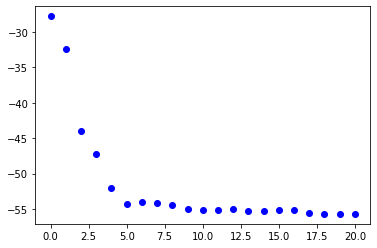

In [ ]:
plt.figure()
[
    plt.scatter(
        i, results.grammars[i].logLikelihood(program.infer(), program), c="blue"
    )
    for i in range(len(results.grammars))
]
plt.show()

In [87]:
program = dc.program.Program.parse(
    "(lambda (lambda (lambda (lambda (t(t (t (t (t (t $0 $3) $3) $3) $3) $1)$1)))))"
)
circuit = execute_program(program, (0, 1, 2, no_op(3)))
q = get_qiskit_circuit(circuit)
q.result.round(3)

array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.-0.j,  0.-0.j,  0.-0.j,
         0.-0.j],
       [ 0.+0.j,  0.+1.j,  0.+0.j,  0.+0.j,  0.-0.j,  0.-0.j,  0.-0.j,
         0.-0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.-0.j,  0.-0.j,  0.-0.j,
         0.-0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+1.j,  0.-0.j,  0.-0.j,  0.-0.j,
         0.-0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.-0.j,  0.-0.j,  0.-0.j,
         0.-0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.-0.j,  0.-1.j,  0.-0.j,
         0.-0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.-0.j,  0.-0.j, -1.-0.j,
         0.-0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.-0.j,  0.-0.j,  0.-0.j,
         0.-1.j]])

In [89]:
program = dc.program.Program.parse(
    "(lambda (lambda (lambda (lambda (s (z $0 $3) $1)))))"
)
circuit = execute_program(program, (0, 1, 2, no_op(3)))
q_2 = get_qiskit_circuit(circuit)

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.-0.j, 0.-0.j, 0.-0.j, 0.-0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.-0.j, 0.-0.j, 0.-0.j, 0.-0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.-0.j, 0.-0.j, 0.-0.j, 0.-0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.-0.j, 0.-0.j, 0.-0.j, 0.-0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.-0.j, 0.-0.j, 0.-0.j, 0.-0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.-0.j, 0.+0.j, 0.-0.j, 0.-0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.-0.j, 0.-0.j, 0.-0.j, 0.-0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.-0.j, 0.-0.j, 0.-0.j, 0.+0.j]])

In [ ]:
for i in range(len(dc.grammar.ENUMERATED_LIST)):
    np.testing.assert_allclose(
        tasks[i].target_circuit_evaluation,
        circuit_to_mat(
            execute_program(dc.grammar.ENUMERATED_LIST[i], (0, 1, 2, (no_op(3))))
        ),
    )

QuantumCircuitException: Invalid selected qubit